In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
import math
from statistics import stdev
from sklearn.model_selection import train_test_split
from google.colab import  drive
import warnings
warnings.filterwarnings( "ignore" )
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline 
from sklearn.model_selection import KFold
from google.colab import files
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.figsize'] = 10, 8

np.seterr(divide='ignore', invalid='ignore')
#np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")


No Warning Shown


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv", header = None)
col =  ["treatment", "y_factual", "y_cfactual",]
for i in range(1,28):
    col.append("x"+str(i))
data.columns = col
data.head()

,treatment,y_factual,y_cfactual,x1,x2,x3,x4,x5,x6,x7,...,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27
0,1,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,0,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,0,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,0,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
4,0,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0


In [ ]:
data.iloc[:,11:30]

,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27
0,1,0,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0
1,0,0,0,1,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,2,0,1,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,1,1,2,0,1,0,1,1,0,0,0,0,0,0
4,1,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0
743,0,0,1,0,0,0,0,2,1,1,1,1,0,0,0,0,0,0,0
744,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0
745,1,0,1,0,0,0,0,2,0,1,1,1,0,0,0,0,0,0,0


In [ ]:
x_data=pd.concat([data.iloc[:,0], data.iloc[:, 2:30]], axis = 1)
y_data=data.iloc[:, 1]

In [ ]:
def params(rs,x_train,y_train):
  #x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=rs )
  df = pd.DataFrame(columns=["p", "PEHE1", "PEHE2","PEHE3", "PEHE4","PEHE5","PEHE6","PEHE7","PEHE8","PEHE9","PEHE10","PEHE_Mean", "PEHE_Std",
                           "ATE1","ATE2","ATE3","ATE4","ATE5","ATE6","ATE7","ATE8","ATE9","ATE10","ATE_Mean","ATE_Std", "n_estimators", "max_depth", "learning_rate"])
  n_estimators = {'key1': 400, 'key2': 500, 'key3': 600}
  max_depth={'key2': 1, 'key3': 2, 'key4': 3}
  learning_rate={'key1': 0.1, 'key2': 0.2, 'key3': 0.3,'key4': 0.01, 'key5': 0.02, 'key6': 0.03}
  for v1 in n_estimators.values():
    for v2 in max_depth.values():
      dt=experiment(v1,v2,x_train,y_train,rs,df)
      df=df.append(dt)
  return df
      #for v3 in learning_rate.values():
        
        #print (v1,v2,v3)

In [ ]:
def params2(rs,x_train,y_train):
  #x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=rs )
  df = pd.DataFrame(columns=["p", "PEHE1", "PEHE2","PEHE3", "PEHE4","PEHE5","PEHE6","PEHE7","PEHE8","PEHE9","PEHE10","PEHE_Mean", "PEHE_Std",
                           "ATE1","ATE2","ATE3","ATE4","ATE5","ATE6","ATE7","ATE8","ATE9","ATE10","ATE_Mean","ATE_Std","c"])
  C= {'key3': 0.01,'key4': 0.1, 'key5': 1, 'key6': 2}
  for c in C.values():
    dt=experiment2(c,x_train,y_train,rs,df)
    df=df.append(dt)
  return df
      #for v3 in learning_rate.values():

In [ ]:
def params3(rs,x_train,y_train):
  #x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=rs )
  df = pd.DataFrame(columns=["p", "PEHE1", "PEHE2","PEHE3", "PEHE4","PEHE5","PEHE6","PEHE7","PEHE8","PEHE9","PEHE10","PEHE_Mean", "PEHE_Std",
                           "ATE1","ATE2","ATE3","ATE4","ATE5","ATE6","ATE7","ATE8","ATE9","ATE10","ATE_Mean","ATE_Std","c"])
  C= {'key3': 0.01,'key4': 0.1, 'key5': 1, 'key6': 2}
  for c in C.values():
    dt=inv_uw(c,x_train,y_train,rs,df)
    df=df.append(dt)
  return df

In [ ]:
def inv_uw (c,x_train,y_train,rs,df):
  k = 10
  #kf = KFold(n_splits=k, random_state=rs, shuffle=True)
  kf = KFold(n_splits=k, random_state=None)  
  #reg = XGBRegressor(n_estimators=v1, max_depth=v2)
  columns = list(df)
  dt=[]
  #for p in list(np.arange(0.1, 5, 0.1)):
  p=0
  results=[]
  results2=[]
  results3=[]
  results.append(p)
  for train_index , test_index in kf.split(x_train):
      X_traink , X_testk = x_train.iloc[train_index,:],x_train.iloc[test_index,:]
      y_traink , y_testk = y_train.iloc[train_index] , y_train.iloc[test_index] 
      X_train_t=X_traink.iloc[:, 2:30]
      Y_train_t=X_traink.iloc[:, 0]
      model = LogisticRegression()    
      #cls = CalibratedClassifierCV(model)
      model.fit( X_train_t, Y_train_t )
      #arr1=model.predict_proba(X_train)
      probs=model.predict_proba(X_train_t)
      data_probs = X_traink[['treatment','y_cfactual']]
      data_probs.loc[:,['P0','P1']] = probs
      data_probs['ipw']= np.where (data_probs['treatment']==1, 1/data_probs['P1'], 1/data_probs['P0'])
      data_probs.loc[:, 'e'] = np.abs(data_probs['treatment'] - data_probs['P1'])
      data_probs.loc[:, 'ep'] = np.power(data_probs.loc[:, 'e'],p)
      weights = np.array(data_probs['ep'])
      invweights = np.array(data_probs['ipw'])
      data_comp_reg=pd.concat([X_traink.iloc[:,0], X_traink.iloc[:, 2:30]], axis = 1)
      reg = SVR(kernel = 'rbf', C=c)
      reg.fit(data_comp_reg, y_traink) #sample_weight = weights
      #reg.fit(data_comp_reg, y_traink, 
      #     eval_set=[(data_comp_reg, y_traink), (X_testk.drop("y_cfactual", axis=1), y_testk)], 
      #      early_stopping_rounds=10, sample_weight = invweights, verbose=False)
      #----------------------------------------------------------------------------------------------------#
      #data2=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 1:30], y_test], axis = 1)
      #data_comp=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 2:30]], axis = 1)
      #------------------------------------------------------------------------
      #data_comp=pd.concat([data.iloc[:,0], data.iloc[:, 3:30]], axis = 1)
      #--------------------------------------------------------------------
      #data2=pd.concat([X_traink.iloc[:,0], X_traink.iloc[:, 1:30], y_traink], axis = 1)
      #data_comp=pd.concat([X_traink.iloc[:,0], X_traink.iloc[:, 2:30]], axis = 1)
      #----------------------------------------------------------------------------------
      data2=pd.concat([X_testk.iloc[:,0], X_testk.iloc[:, 1:30], y_testk], axis = 1)
      data_comp=pd.concat([X_testk.iloc[:,0], X_testk.iloc[:, 2:30]], axis = 1)

      y1_data=data_comp.copy()
      y0_data=data_comp.copy()
      y1_data['treatment']=1
      y0_data['treatment']=0

      #y_estimated = reg.predict(data_comp, ntree_limit=reg.best_ntree_limit)
      #y1_estimated = reg.predict(y1_data,ntree_limit=reg.best_ntree_limit)
      #y0_estimated = reg.predict(y0_data,ntree_limit=reg.best_ntree_limit)

      y_estimated = reg.predict(data_comp)
      y1_estimated = reg.predict(y1_data)
      y0_estimated = reg.predict(y0_data)

      mask1 = data_comp['treatment']==1
      mask0 = data_comp['treatment']==0
      ATE_Estimated = np.mean(y_estimated[mask1])- np.mean(y_estimated[mask0])

      #y1_actual = data[data["treatment"]==1]
      #y0_actual = data[data["treatment"]==0]

      y1_actual = data2[data2["treatment"]==1]
      y0_actual = data2[data2["treatment"]==0]

      ATE_Actual=np.mean(y1_actual["y_factual"])- np.mean(y0_actual["y_factual"])
      
      ITE_Estimated = y1_estimated - y0_estimated
      #ITE_Actual = np.where(data['treatment'] == 1,  data['y_factual']-data['y_cfactual'], data['y_cfactual']-data['y_factual'])
      ITE_Actual = np.where(data2['treatment'] == 1,  data2['y_factual']-data2['y_cfactual'], data2['y_cfactual']-data2['y_factual'])

      PEHE=math.sqrt(np.square((ITE_Actual)-(ITE_Estimated)).mean())
      #print('p:', p, 'PEHE = ',PEHE)
      results.append(PEHE)
      results2.append(ATE_Actual-ATE_Estimated)
  results.append(np.mean(results[1:11]))
  results.append(stdev(results[1:11]))
  results2.append(np.mean(results2[0:10]))
  results2.append(stdev(results2[0:10]))
  result3=[c]
  zipped = zip(columns, results+results2+result3)
  a_dictionary = dict(zipped)
  dt.append(a_dictionary)
  return dt

In [ ]:
def experiment2 (c,x_train,y_train,rs,df):
  k = 10
  #kf = KFold(n_splits=k, random_state=rs, shuffle=True)
  kf = KFold(n_splits=k, random_state=None)  
  #reg = XGBRegressor(n_estimators=v1, max_depth=v2)
  columns = list(df)
  dt=[]
  #for p in list(np.arange(0.1, 4, 0.1)):
  for p in range(1,15):
    
    results=[]
    results2=[]
    results3=[]
    results.append(p)
    for train_index , test_index in kf.split(x_train):
        X_traink , X_testk = x_train.iloc[train_index,:],x_train.iloc[test_index,:]
        y_traink , y_testk = y_train.iloc[train_index] , y_train.iloc[test_index] 
        #X_train_t=X_traink.iloc[:, 2:30]
        X_train_t=X_traink.iloc[:, 2:30]
        Y_train_t=X_traink.iloc[:, 0]
        model = LogisticRegression()    
        #cls = CalibratedClassifierCV(model)
        model.fit( X_train_t, Y_train_t )
        #arr1=model.predict_proba(X_train)
        probs=model.predict_proba(X_train_t)
        data_probs = X_traink[['treatment','y_cfactual']]
        data_probs.loc[:,['P0','P1']] = probs
        data_probs['ipw']= np.where (data_probs['treatment']==1, 1/data_probs['P1'], 1/data_probs['P0'])
        data_probs.loc[:, 'e'] = np.abs(data_probs['treatment'] - data_probs['P1'])
        #data_probs.loc[:, 'ep'] = np.power(data_probs.loc[:, 'e'],p)
        data_probs.loc[:, 'ep'] = (data_probs.loc[:, 'e']*p)
        weights = np.array(data_probs['ep'])
        invweights = np.array(data_probs['ipw'])
        data_comp_reg=pd.concat([X_traink.iloc[:,0], X_traink.iloc[:, 2:30]], axis = 1)
        reg = SVR(kernel = 'rbf', C=c)
        reg.fit(data_comp_reg, y_traink, sample_weight = weights)
        #reg.fit(data_comp_reg, y_traink, 
        #     eval_set=[(data_comp_reg, y_traink), (X_testk.drop("y_cfactual", axis=1), y_testk)], 
        #      early_stopping_rounds=10, sample_weight = invweights, verbose=False)
        #----------------------------------------------------------------------------------------------------#
        #data2=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 1:30], y_test], axis = 1)
        #data_comp=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 2:30]], axis = 1)
        #------------------------------------------------------------------------
        #data_comp=pd.concat([data.iloc[:,0], data.iloc[:, 3:30]], axis = 1)
        #--------------------------------------------------------------------
        #data2=pd.concat([X_traink.iloc[:,0], X_traink.iloc[:, 1:30], y_traink], axis = 1)
        #data_comp=pd.concat([X_traink.iloc[:,0], X_traink.iloc[:, 2:30]], axis = 1)
        #----------------------------------------------------------------------------------
        data2=pd.concat([X_testk.iloc[:,0], X_testk.iloc[:, 1:30], y_testk], axis = 1)
        data_comp=pd.concat([X_testk.iloc[:,0], X_testk.iloc[:, 2:30]], axis = 1)

        y1_data=data_comp.copy()
        y0_data=data_comp.copy()
        y1_data['treatment']=1
        y0_data['treatment']=0

        #y_estimated = reg.predict(data_comp, ntree_limit=reg.best_ntree_limit)
        #y1_estimated = reg.predict(y1_data,ntree_limit=reg.best_ntree_limit)
        #y0_estimated = reg.predict(y0_data,ntree_limit=reg.best_ntree_limit)

        y_estimated = reg.predict(data_comp)
        y1_estimated = reg.predict(y1_data)
        y0_estimated = reg.predict(y0_data)

        mask1 = data_comp['treatment']==1
        mask0 = data_comp['treatment']==0
        ATE_Estimated = np.mean(y_estimated[mask1])- np.mean(y_estimated[mask0])

        #y1_actual = data[data["treatment"]==1]
        #y0_actual = data[data["treatment"]==0]

        y1_actual = data2[data2["treatment"]==1]
        y0_actual = data2[data2["treatment"]==0]

        ATE_Actual=np.mean(y1_actual["y_factual"])- np.mean(y0_actual["y_factual"])
        
        ITE_Estimated = y1_estimated - y0_estimated
        #ITE_Actual = np.where(data['treatment'] == 1,  data['y_factual']-data['y_cfactual'], data['y_cfactual']-data['y_factual'])
        ITE_Actual = np.where(data2['treatment'] == 1,  data2['y_factual']-data2['y_cfactual'], data2['y_cfactual']-data2['y_factual'])

        PEHE=math.sqrt(np.square((ITE_Actual)-(ITE_Estimated)).mean())
        #print('p:', p, 'PEHE = ',PEHE)
        results.append(PEHE)
        results2.append(ATE_Actual-ATE_Estimated)
    results.append(np.mean(results[1:11]))
    results.append(stdev(results[1:11]))
    results2.append(np.mean(results2[0:10]))
    results2.append(stdev(results2[0:10]))
    result3=[c]
    zipped = zip(columns, results+results2+result3)
    a_dictionary = dict(zipped)
    dt.append(a_dictionary)
  return dt

In [ ]:
#df = pd.DataFrame(columns=["p", "PEHE1", "PEHE2","PEHE3", "PEHE4","PEHE5","PEHE6","PEHE7","PEHE8","PEHE9","PEHE10","PEHE_Mean", "PEHE_Std",
#                           "ATE1","ATE2","ATE3","ATE4","ATE5","ATE6","ATE7","ATE8","ATE9","ATE10","ATE_Mean","ATE_Std", "n_estimators", "max_depth", "learning_rate"])
def experiment (v1,v2,x_train,y_train,rs,df):
  k = 10
  #kf = KFold(n_splits=k, random_state=rs, shuffle=True)
  kf = KFold(n_splits=k, random_state=None)  
  #reg = XGBRegressor(n_estimators=v1, max_depth=v2)
  columns = list(df)
  dt=[]
#for p in list(np.arange(0.1, 5, 0.1)):
  p=0
  results=[]
  results2=[]
  results3=[]
  results.append(p)
  for train_index , test_index in kf.split(x_train):
      X_traink , X_testk = x_train.iloc[train_index,:],x_train.iloc[test_index,:]
      y_traink , y_testk = y_train.iloc[train_index] , y_train.iloc[test_index] 
      X_train_t=X_traink.iloc[:, 2:30]
      Y_train_t=X_traink.iloc[:, 0]
      model = LogisticRegression()    
      #cls = CalibratedClassifierCV(model)
      model.fit( X_train_t, Y_train_t )
      #arr1=model.predict_proba(X_train)
      probs=model.predict_proba(X_train_t)
      data_probs = X_traink[['treatment','y_cfactual']]
      data_probs.loc[:,['P0','P1']] = probs
      data_probs['ipw']= np.where (data_probs['treatment']==1, 1/data_probs['P1'], 1/data_probs['P0'])
      data_probs.loc[:, 'e'] = np.abs(data_probs['treatment'] - data_probs['P1'])
      data_probs.loc[:, 'ep'] = np.power(data_probs.loc[:, 'e'],p)
      weights = np.array(data_probs['ep'])
      invweights = np.array(data_probs['ipw'])
      data_comp_reg=pd.concat([X_traink.iloc[:,0], X_traink.iloc[:, 2:30]], axis = 1)
      reg = SVR(kernel = 'rbf')
     
      reg.fit(data_comp_reg, y_traink)
      #reg.fit(data_comp_reg, y_traink, 
      #     eval_set=[(data_comp_reg, y_traink), (X_testk.drop("y_cfactual", axis=1), y_testk)], 
      #      early_stopping_rounds=10, sample_weight = invweights, verbose=False)
      #----------------------------------------------------------------------------------------------------#
      #data2=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 1:30], y_test], axis = 1)
      #data_comp=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 2:30]], axis = 1)
      #------------------------------------------------------------------------
      #data_comp=pd.concat([data.iloc[:,0], data.iloc[:, 3:30]], axis = 1)
      #--------------------------------------------------------------------
      #data2=pd.concat([X_traink.iloc[:,0], X_traink.iloc[:, 1:30], y_traink], axis = 1)
      #data_comp=pd.concat([X_traink.iloc[:,0], X_traink.iloc[:, 2:30]], axis = 1)
      #----------------------------------------------------------------------------------
      data2=pd.concat([X_testk.iloc[:,0], X_testk.iloc[:, 1:30], y_testk], axis = 1)
      data_comp=pd.concat([X_testk.iloc[:,0], X_testk.iloc[:, 2:30]], axis = 1)

      y1_data=data_comp.copy()
      y0_data=data_comp.copy()
      y1_data['treatment']=1
      y0_data['treatment']=0

      #y_estimated = reg.predict(data_comp, ntree_limit=reg.best_ntree_limit)
      #y1_estimated = reg.predict(y1_data,ntree_limit=reg.best_ntree_limit)
      #y0_estimated = reg.predict(y0_data,ntree_limit=reg.best_ntree_limit)

      y_estimated = reg.predict(data_comp)
      y1_estimated = reg.predict(y1_data)
      y0_estimated = reg.predict(y0_data)

      mask1 = data_comp['treatment']==1
      mask0 = data_comp['treatment']==0
      ATE_Estimated = np.mean(y_estimated[mask1])- np.mean(y_estimated[mask0])

      #y1_actual = data[data["treatment"]==1]
      #y0_actual = data[data["treatment"]==0]

      y1_actual = data2[data2["treatment"]==1]
      y0_actual = data2[data2["treatment"]==0]

      ATE_Actual=np.mean(y1_actual["y_factual"])- np.mean(y0_actual["y_factual"])
      
      ITE_Estimated = y1_estimated - y0_estimated
      #ITE_Actual = np.where(data['treatment'] == 1,  data['y_factual']-data['y_cfactual'], data['y_cfactual']-data['y_factual'])
      ITE_Actual = np.where(data2['treatment'] == 1,  data2['y_factual']-data2['y_cfactual'], data2['y_cfactual']-data2['y_factual'])

      PEHE=math.sqrt(np.square((ITE_Actual)-(ITE_Estimated)).mean())
      #print('p:', p, 'PEHE = ',PEHE)
      results.append(PEHE)
      results2.append(ATE_Actual-ATE_Estimated)
  results.append(np.mean(results[1:11]))
  results.append(stdev(results[1:11]))
  results2.append(np.mean(results2[0:10]))
  results2.append(stdev(results2[0:10]))
  result3=[v1,v2]
  zipped = zip(columns, results+results2+result3)
  a_dictionary = dict(zipped)
  dt.append(a_dictionary)
  return dt
#df=df.append(dt)


In [ ]:
check_array=np.array([1,2,3,4,5,6])
mgreater=np.where(check_array>3)
print(mgreater)

(array([3, 4, 5]),)


In [ ]:
#.........................................PEHE Calculation
ITE_data=df = pd.DataFrame()
ITE_act_data=df = pd.DataFrame()
PEHER=[]
ATER=[]
PEHE_Result = pd.DataFrame()
for i in range(50):
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=i)
  #iteration=params3(i,x_train,y_train)
  #iteration=params2(i,x_train,y_train)
  #val=iteration['PEHE_Mean'].min()
  #check =iteration[iteration['PEHE_Mean']==val]
  #p=check['p'].values[0]
  #c=check['c'].values[0]
  p=30
  #x_traina, x_val, y_traina, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=i)
  #x_traina, x_val, y_traina, y_val = train_test_split(x_train, y_train, test_size=0.10)
  #reg = XGBRegressor(n_estimators=check['n_estimators'].values[0], max_depth=check['max_depth'].values[0])
  #reg = XGBRegressor(n_estimators=500, max_depth=2)


  #X_train_t=x_train.iloc[:, 2:30]
  X_train_t=x_train.iloc[:, 4:30]
  Y_train_t=x_train.iloc[:, 0]
  model = LogisticRegression()   
  
  #cls = CalibratedClassifierCV(model)
  model.fit( X_train_t, Y_train_t )
  #arr1=model.predict_proba(X_train)
  probs=model.predict_proba(X_train_t)
  data_probs = x_train[['treatment','y_cfactual']]
  data_probs.loc[:,['P0','P1']] = probs
  data_probs['ipw']= np.where (data_probs['treatment']==1, 1/data_probs['P1'], 1/data_probs['P0'])
  #data_probs['ipw']= 1/data_probs['P1']
  data_probs.loc[:, 'e'] = np.abs(data_probs['treatment'] - data_probs['P1'])
  #data_probs.loc[:, 'ep'] = np.power(data_probs.loc[:, 'e'],p)
  #inwindow=data_probs['e']>=0.3
  #outwindow=data_probs['e']<0.3

  data_probs.loc[:, 'ep'] =(data_probs.loc[:, 'e']*p)
  #data_probs.loc[:, 'ep'] =np.where(data_probs['e'] >= 0.47, data_probs['e']*p, data_probs['e']*(p*0.80))
  weights = np.array(data_probs['ep'])
  invweights = np.array(data_probs['ipw'])


 # data_comp_reg=pd.concat([x_train.iloc[:,0], x_train.iloc[:, 2:30]], axis = 1)
  data_comp_reg=pd.concat([x_train.iloc[:,0], x_train.iloc[:, 4:30]], axis = 1)

  #polynomial = PolynomialFeatures(degree=3)
  #feat_poly = polynomial.fit_transform(data_comp_reg)
  #reg = linear_model.LinearRegression()
  #reg = RandomForestRegressor()
  #reg = MLPRegressor(max_iter=2000)
  #reg = DecisionTreeRegressor()
  #reg=Ridge()
  reg = SVR() #,C=c
  reg.fit(data_comp_reg, y_train,sample_weight = weights)# sample_weight = weights
  #reg.fit(data_comp_reg, y_traina, 
  #      eval_set=[(data_comp_reg, y_traina), (x_val.drop("y_cfactual", axis=1), y_val)], 
  #      early_stopping_rounds=10, sample_weight = invweights, verbose=False)
  #-----------------------------------------------------------------------------------------------------------
  data2=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 1:30], y_test], axis = 1)
  #data_comp=pd.concat([data.iloc[:,0], data.iloc[:, 3:30]], axis = 1)


  #data_comp=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 2:30]], axis = 1)
  data_comp=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 4:30]], axis = 1)

  y1_data=data_comp.copy()
  y0_data=data_comp.copy()
  y1_data['treatment']=1
  y0_data['treatment']=0

  #y_estimated = reg.predict(data_comp, ntree_limit=reg.best_ntree_limit)
  #y1_estimated = reg.predict(y1_data,ntree_limit=reg.best_ntree_limit)
  #y0_estimated = reg.predict(y0_data,ntree_limit=reg.best_ntree_limit)

  y_estimated = reg.predict(data_comp)
  y1_estimated = reg.predict(y1_data)
  y0_estimated = reg.predict(y0_data)

  mask1 = data_comp['treatment']==1
  mask0 = data_comp['treatment']==0
  ATE_Estimated = np.mean(y_estimated[mask1])- np.mean(y_estimated[mask0])
  

  #y1_actual = data[data["treatment"]==1]
  #y0_actual = data[data["treatment"]==0]

  y1_actual = data2[data2["treatment"]==1]
  y0_actual = data2[data2["treatment"]==0]

  ATE_Actual=np.mean(y1_actual["y_factual"])- np.mean(y0_actual["y_factual"])
  ATER.append(ATE_Actual-ATE_Estimated)
  ITE_Estimated = y1_estimated - y0_estimated
  ITE_new=ITE_Estimated.reshape(1,-1)
  ITE_data=ITE_data.append(pd.DataFrame(ITE_new), ignore_index=True)
  #ITE_Actual = np.where(data['treatment'] == 1,  data['y_factual']-data['y_cfactual'], data['y_cfactual']-data['y_factual'])
  #ITE_Actual = np.where(data2['treatment'] == 1,  data2['y_factual']-data2['y_cfactual'], data2['y_cfactual']-data2['y_factual'])
  #ITE_Actual = (data2['y_cfactual']-data2['y_factual'])
  ITE_Actual = np.array((data2['x2']-data2['x1']))
  ITE_new_actual=ITE_Actual.reshape(1,-1)
  ITE_act_data=ITE_act_data.append(pd.DataFrame(ITE_new_actual), ignore_index=True)

  PEHE=math.sqrt(np.square((ITE_Actual)-(ITE_Estimated)).mean())
  PEHER.append(PEHE)
  #print (p)
PEHE_Result=PEHE_Result.append(PEHER)
#PEHE_Result.to_csv('Experiment_IPW_NRS.csv')
#files.download("Experiment_IPW_NRS.csv")
#print(PEHE)

In [ ]:
print (np.mean(PEHER))
print (stdev(PEHER))

0.7713767106573438
0.06556084608448608


In [ ]:
print (np.mean(ATER))
print (stdev(ATER))

0.21329575079743252
0.2679358193060738


In [ ]:
#.........................................ATE Calculation based on p
ITE_data=df = pd.DataFrame()
ITE_act_data=df = pd.DataFrame()
PEHER=[]
ATE_Result=[]
PEHE_Result = pd.DataFrame()
for p in range(1,80):
  ATER=[]
  for i in range(40):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=i)
    #iteration=params3(i,x_train,y_train)
    #iteration=params2(i,x_train,y_train)
    #val=iteration['PEHE_Mean'].min()
    #check =iteration[iteration['PEHE_Mean']==val]
    #p=check['p'].values[0]
    #c=check['c'].values[0]
    #p=30
    #x_traina, x_val, y_traina, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=i)
    #x_traina, x_val, y_traina, y_val = train_test_split(x_train, y_train, test_size=0.10)
    #reg = XGBRegressor(n_estimators=check['n_estimators'].values[0], max_depth=check['max_depth'].values[0])
    #reg = XGBRegressor(n_estimators=500, max_depth=2)


    #X_train_t=x_train.iloc[:, 2:30]
    X_train_t=x_train.iloc[:, 4:30]
    Y_train_t=x_train.iloc[:, 0]
    model = LogisticRegression()   
    
    #cls = CalibratedClassifierCV(model)
    model.fit( X_train_t, Y_train_t )
    #arr1=model.predict_proba(X_train)
    probs=model.predict_proba(X_train_t)
    data_probs = x_train[['treatment','y_cfactual']]
    data_probs.loc[:,['P0','P1']] = probs
    data_probs['ipw']= np.where (data_probs['treatment']==1, 1/data_probs['P1'], 1/data_probs['P0'])
    #data_probs['ipw']= 1/data_probs['P1']
    data_probs.loc[:, 'e'] = np.abs(data_probs['treatment'] - data_probs['P1'])
    #data_probs.loc[:, 'ep'] = np.power(data_probs.loc[:, 'e'],p)
    #inwindow=data_probs['e']>=0.3
    #outwindow=data_probs['e']<0.3

    data_probs.loc[:, 'ep'] =(data_probs.loc[:, 'e']*p)
    #data_probs.loc[:, 'ep'] =np.where(data_probs['e'] >= 0.47, data_probs['e']*p, data_probs['e']*(p*0.80))
    weights = np.array(data_probs['ep'])
    invweights = np.array(data_probs['ipw'])


  # data_comp_reg=pd.concat([x_train.iloc[:,0], x_train.iloc[:, 2:30]], axis = 1)
    data_comp_reg=pd.concat([x_train.iloc[:,0], x_train.iloc[:, 4:30]], axis = 1)

    #polynomial = PolynomialFeatures(degree=3)
    #feat_poly = polynomial.fit_transform(data_comp_reg)
    #reg = linear_model.LinearRegression()
    #reg = RandomForestRegressor()
    #reg = MLPRegressor(max_iter=2000)
    #reg = DecisionTreeRegressor()
    #reg=Ridge()
    reg = SVR() #,C=c
    reg.fit(data_comp_reg, y_train,sample_weight = weights)# sample_weight = weights
    #reg.fit(data_comp_reg, y_traina, 
    #      eval_set=[(data_comp_reg, y_traina), (x_val.drop("y_cfactual", axis=1), y_val)], 
    #      early_stopping_rounds=10, sample_weight = invweights, verbose=False)
    #-----------------------------------------------------------------------------------------------------------
    data2=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 1:30], y_test], axis = 1)
    #data_comp=pd.concat([data.iloc[:,0], data.iloc[:, 3:30]], axis = 1)


    #data_comp=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 2:30]], axis = 1)
    data_comp=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 4:30]], axis = 1)

    y1_data=data_comp.copy()
    y0_data=data_comp.copy()
    y1_data['treatment']=1
    y0_data['treatment']=0

    #y_estimated = reg.predict(data_comp, ntree_limit=reg.best_ntree_limit)
    #y1_estimated = reg.predict(y1_data,ntree_limit=reg.best_ntree_limit)
    #y0_estimated = reg.predict(y0_data,ntree_limit=reg.best_ntree_limit)

    y_estimated = reg.predict(data_comp)
    y1_estimated = reg.predict(y1_data)
    y0_estimated = reg.predict(y0_data)

    mask1 = data_comp['treatment']==1
    mask0 = data_comp['treatment']==0
    ATE_Estimated = np.mean(y_estimated[mask1])- np.mean(y_estimated[mask0])
    

    #y1_actual = data[data["treatment"]==1]
    #y0_actual = data[data["treatment"]==0]

    y1_actual = data2[data2["treatment"]==1]
    y0_actual = data2[data2["treatment"]==0]

    ATE_Actual=np.mean(y1_actual["y_factual"])- np.mean(y0_actual["y_factual"])
    ATER.append(ATE_Actual-ATE_Estimated)
    ITE_Estimated = y1_estimated - y0_estimated
    ITE_new=ITE_Estimated.reshape(1,-1)
    ITE_data=ITE_data.append(pd.DataFrame(ITE_new), ignore_index=True)
    #ITE_Actual = np.where(data['treatment'] == 1,  data['y_factual']-data['y_cfactual'], data['y_cfactual']-data['y_factual'])
    #ITE_Actual = np.where(data2['treatment'] == 1,  data2['y_factual']-data2['y_cfactual'], data2['y_cfactual']-data2['y_factual'])
    #ITE_Actual = (data2['y_cfactual']-data2['y_factual'])
    ITE_Actual = np.array((data2['x2']-data2['x1']))
    ITE_new_actual=ITE_Actual.reshape(1,-1)
    ITE_act_data=ITE_act_data.append(pd.DataFrame(ITE_new_actual), ignore_index=True)

    PEHE=math.sqrt(np.square((ITE_Actual)-(ITE_Estimated)).mean())
    PEHER.append(PEHE)
    #print (p)
  PEHE_Result=PEHE_Result.append(PEHER)
  #get mean and std of each p here...
  ATE_Result.append((p,np.mean(ATER),stdev(ATER)))

#PEHE_Result.to_csv('Experiment_IPW_NRS.csv')
#files.download("Experiment_IPW_NRS.csv")
#print(PEHE)

In [ ]:
min(ATE_Result, key = lambda t: t[1])

(79, 0.1935741449340421, 0.2546482399640811)

In [ ]:
# To Show PEHE with p
#---------------------------------------------------------------------------------------------------
PEHE_p=[]
#PEHE_Result = pd.DataFrame()
for i in range(1,31):
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
  #iteration=params3(i,x_train,y_train)
  #iteration=params2(i,x_train,y_train)
  #val=iteration['PEHE_Mean'].min()
  #check =iteration[iteration['PEHE_Mean']==val]
  #p=check['p'].values[0]
  #c=check['c'].values[0]
  p=i
  #x_traina, x_val, y_traina, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=i)
  #x_traina, x_val, y_traina, y_val = train_test_split(x_train, y_train, test_size=0.10)
  #reg = XGBRegressor(n_estimators=check['n_estimators'].values[0], max_depth=check['max_depth'].values[0])
  #reg = XGBRegressor(n_estimators=500, max_depth=2)


  #X_train_t=x_train.iloc[:, 2:30]
  X_train_t=x_train.iloc[:, 4:30]
  Y_train_t=x_train.iloc[:, 0]
  model = LogisticRegression()   
  
  #cls = CalibratedClassifierCV(model)
  model.fit( X_train_t, Y_train_t )
  #arr1=model.predict_proba(X_train)
  probs=model.predict_proba(X_train_t)
  data_probs = x_train[['treatment','y_cfactual']]
  data_probs.loc[:,['P0','P1']] = probs
  data_probs['ipw']= np.where (data_probs['treatment']==1, 1/data_probs['P1'], 1/data_probs['P0'])
  #data_probs['ipw']= 1/data_probs['P1']
  data_probs.loc[:, 'e'] = np.abs(data_probs['treatment'] - data_probs['P1'])
  #data_probs.loc[:, 'ep'] = np.power(data_probs.loc[:, 'e'],p)
  data_probs.loc[:, 'ep'] =(data_probs.loc[:, 'e']*p)
  weights = np.array(data_probs['ep'])
  invweights = np.array(data_probs['ipw'])


 # data_comp_reg=pd.concat([x_train.iloc[:,0], x_train.iloc[:, 2:30]], axis = 1)
  data_comp_reg=pd.concat([x_train.iloc[:,0], x_train.iloc[:, 4:30]], axis = 1)

  #polynomial = PolynomialFeatures(degree=3)
  #feat_poly = polynomial.fit_transform(data_comp_reg)
  #reg = linear_model.LinearRegression()
  #reg = RandomForestRegressor()
  #reg = MLPRegressor(max_iter=2000)
  #reg = DecisionTreeRegressor()
  #reg=Ridge()
  reg = SVR() #,C=c
  reg.fit(data_comp_reg, y_train,sample_weight = weights)# sample_weight = weights
  #reg.fit(data_comp_reg, y_traina, 
  #      eval_set=[(data_comp_reg, y_traina), (x_val.drop("y_cfactual", axis=1), y_val)], 
  #      early_stopping_rounds=10, sample_weight = invweights, verbose=False)
  #-----------------------------------------------------------------------------------------------------------
  data2=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 1:30], y_test], axis = 1)
  #data_comp=pd.concat([data.iloc[:,0], data.iloc[:, 3:30]], axis = 1)


  #data_comp=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 2:30]], axis = 1)
  data_comp=pd.concat([x_test.iloc[:,0], x_test.iloc[:, 4:30]], axis = 1)

  y1_data=data_comp.copy()
  y0_data=data_comp.copy()
  y1_data['treatment']=1
  y0_data['treatment']=0

  #y_estimated = reg.predict(data_comp, ntree_limit=reg.best_ntree_limit)
  #y1_estimated = reg.predict(y1_data,ntree_limit=reg.best_ntree_limit)
  #y0_estimated = reg.predict(y0_data,ntree_limit=reg.best_ntree_limit)

  y_estimated = reg.predict(data_comp)
  y1_estimated = reg.predict(y1_data)
  y0_estimated = reg.predict(y0_data)

  mask1 = data_comp['treatment']==1
  mask0 = data_comp['treatment']==0
  ATE_Estimated = np.mean(y_estimated[mask1])- np.mean(y_estimated[mask0])

  #y1_actual = data[data["treatment"]==1]
  #y0_actual = data[data["treatment"]==0]

  y1_actual = data2[data2["treatment"]==1]
  y0_actual = data2[data2["treatment"]==0]

  ATE_Actual=np.mean(y1_actual["y_factual"])- np.mean(y0_actual["y_factual"])

  ITE_Estimated = y1_estimated - y0_estimated
  #ITE_Actual = np.where(data['treatment'] == 1,  data['y_factual']-data['y_cfactual'], data['y_cfactual']-data['y_factual'])
  #ITE_Actual = np.where(data2['treatment'] == 1,  data2['y_factual']-data2['y_cfactual'], data2['y_cfactual']-data2['y_factual'])
  #ITE_Actual = (data2['y_cfactual']-data2['y_factual'])
  ITE_Actual = (data2['x2']-data2['x1'])

  PEHE=math.sqrt(np.square((ITE_Actual)-(ITE_Estimated)).mean())
  PEHE_p.append(PEHE)
  #print (p)
#PEHE_Result=PEHE_Result.append(PEHER)

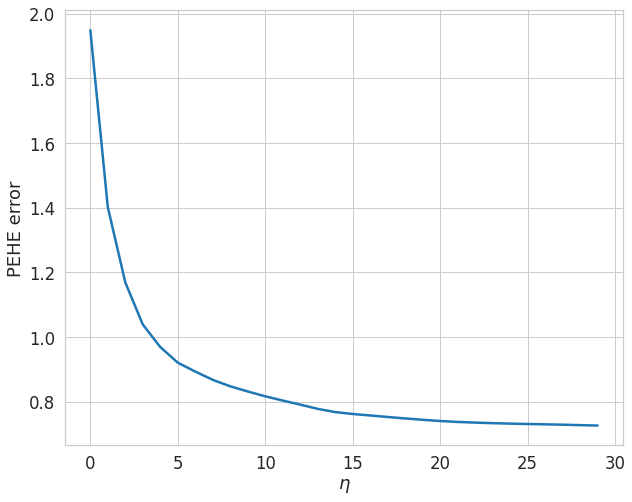

In [ ]:
plt.plot(PEHE_p)
plt.xlabel(r'$\eta$')
plt.ylabel("PEHE error")
plt.show()

In [ ]:
# Effect of p on propensity score
PEHE_p=[]
#PEHE_Result = pd.DataFrame()
#for i in range(1,31):
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
#iteration=params3(i,x_train,y_train)
#iteration=params2(i,x_train,y_train)
#val=iteration['PEHE_Mean'].min()
#check =iteration[iteration['PEHE_Mean']==val]
#p=check['p'].values[0]
#c=check['c'].values[0]
p=10
#x_traina, x_val, y_traina, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=i)
#x_traina, x_val, y_traina, y_val = train_test_split(x_train, y_train, test_size=0.10)
#reg = XGBRegressor(n_estimators=check['n_estimators'].values[0], max_depth=check['max_depth'].values[0])
#reg = XGBRegressor(n_estimators=500, max_depth=2)


#X_train_t=x_train.iloc[:, 2:30]
X_train_t=x_train.iloc[:, 4:30]
Y_train_t=x_train.iloc[:, 0]
model = LogisticRegression()   

#cls = CalibratedClassifierCV(model)
model.fit( X_train_t, Y_train_t )
#arr1=model.predict_proba(X_train)
probs=model.predict_proba(X_train_t)
data_probs = x_train[['treatment','y_cfactual']]
data_probs.loc[:,['P0','P1']] = probs
data_probs['ipw']= np.where (data_probs['treatment']==1, 1/data_probs['P1'], 1/data_probs['P0'])
#data_probs['ipw']= 1/data_probs['P1']
data_probs.loc[:, 'e'] = np.abs(data_probs['treatment'] - data_probs['P1'])
#data_probs.loc[:, 'ep'] = np.power(data_probs.loc[:, 'e'],p)
data_probs.loc[:, 'ep'] =(data_probs.loc[:, 'e']*p)
weights = np.array(data_probs['ep'])
invweights = np.array(data_probs['ipw'])






Text(0, 0.5, 'density')

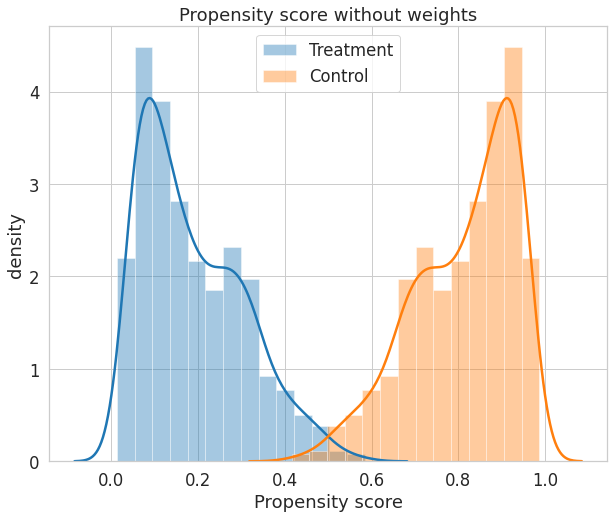

In [ ]:
ax = sns.distplot(data_probs['P1'], label="Treatment")
ax=sns.distplot(data_probs['P0'], label="Control")
ax.set_xlabel('Propensity score')
plt.legend()
plt.title("Propensity score without weights")
ax.set_ylabel('density')


In [ ]:
# Effect of p on ROC and PR curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
PEHE_p=[]
#PEHE_Result = pd.DataFrame()
#for i in range(1,31):
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
p=30
#X_train_t=x_train.iloc[:, 2:30]
X_train_t=x_train.iloc[:, 4:30]
Y_train_t=x_train.iloc[:, 0]
X_test_t=x_test.iloc[:, 4:30]
Y_test_t=x_test.iloc[:, 0]
model11 = LogisticRegression()   

#cls = CalibratedClassifierCV(model)
model11.fit( X_train_t, Y_train_t )
lr_probs = model11.predict_proba(X_test_t)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(Y_test_t, lr_probs)
#arr1=model.predict_proba(X_train)
probs11=model11.predict_proba(X_train_t)
data_probs11 = x_train[['treatment','y_cfactual']]
data_probs11.loc[:,['P0','P1']] = probs11
#data_probs['ipw']= np.where (data_probs['treatment']==1, 1/data_probs['P1'], 1/data_probs['P0'])
data_probs11['ipw']= 1/data_probs11['P1']
data_probs11.loc[:, 'e'] = np.abs(data_probs11['treatment'] - data_probs11['P1'])
#data_probs.loc[:, 'ep'] = np.power(data_probs.loc[:, 'e'],p)
data_probs11.loc[:, 'ep'] =(data_probs11.loc[:, 'e']*p)
weights11 = np.array(data_probs11['ep'])
invweights11 = np.array(data_probs11['ipw'])
lr_precision, lr_recall, _ = precision_recall_curve(Y_test_t, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test_t, lr_probs)
lr0_auc = auc(lr_recall, lr_precision)
# plot the roc curve for the model


In [ ]:
model12 = LogisticRegression()   

#cls = CalibratedClassifierCV(model)
model12.fit( X_train_t, Y_train_t,sample_weight=weights11)
lr1_probs = model12.predict_proba(X_test_t)
# keep probabilities for the positive outcome only
lr1_probs = lr1_probs[:, 1]
lr1_auc = roc_auc_score(Y_test_t, lr1_probs)
probs12=model12.predict_proba(X_train_t)
lr1_fpr, lr1_tpr, _ = roc_curve(Y_test_t, lr1_probs)
lr1_precision, lr1_recall, _ = precision_recall_curve(Y_test_t, lr1_probs)
lr11_auc = auc(lr1_recall, lr1_precision)
data_probs12 = x_train[['treatment','y_cfactual']]
data_probs12.loc[:,['P0','P1']] = probs12

In [ ]:
model13 = LogisticRegression()   

#cls = CalibratedClassifierCV(model)
model13.fit( X_train_t, Y_train_t,sample_weight=invweights11)
lr2_probs = model13.predict_proba(X_test_t)
lr2_probs = lr2_probs[:, 1]
lr2_auc = roc_auc_score(Y_test_t, lr2_probs)
lr2_precision, lr2_recall, _ = precision_recall_curve(Y_test_t, lr2_probs)
lr22_auc = auc(lr2_recall, lr2_precision)
# keep probabilities for the positive outcome only
probs13=model13.predict_proba(X_train_t)
lr2_fpr, lr2_tpr, _ = roc_curve(Y_test_t, lr2_probs)
data_probs13 = x_train[['treatment','y_cfactual']]
data_probs13.loc[:,['P0','P1']] = probs13

In [ ]:
print(lr_auc,lr1_auc,lr2_auc)

0.7376344086021505 0.6419354838709678 0.7155913978494624


In [ ]:
print (lr0_auc,lr11_auc,lr22_auc)

0.4143580280979663 0.24904580189236686 0.41730197788554063


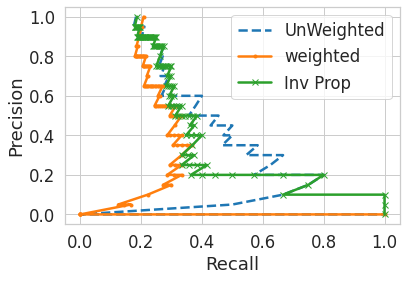

In [ ]:
pyplot.plot(lr_precision, lr_recall, linestyle='--', label='UnWeighted')
pyplot.plot(lr1_precision, lr1_recall, marker='.', label='weighted')
pyplot.plot(lr2_precision, lr2_recall, marker='x', label='Inv Prop')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

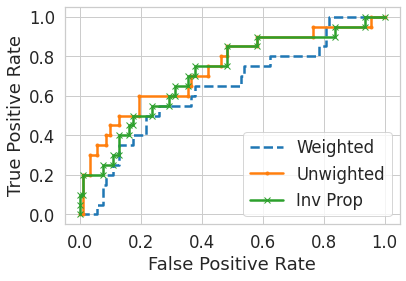

In [ ]:
pyplot.plot(lr1_fpr, lr1_tpr, linestyle='--', label='Weighted')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Unwighted')
pyplot.plot(lr2_fpr, lr2_tpr, marker='x', label='Inv Prop')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Effect of p on propensity score
PEHE_p=[]
#PEHE_Result = pd.DataFrame()
#for i in range(1,31):
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
#iteration=params3(i,x_train,y_train)
#iteration=params2(i,x_train,y_train)
#val=iteration['PEHE_Mean'].min()
#check =iteration[iteration['PEHE_Mean']==val]
#p=check['p'].values[0]
#c=check['c'].values[0]
p=20
#x_traina, x_val, y_traina, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=i)
#x_traina, x_val, y_traina, y_val = train_test_split(x_train, y_train, test_size=0.10)
#reg = XGBRegressor(n_estimators=check['n_estimators'].values[0], max_depth=check['max_depth'].values[0])
#reg = XGBRegressor(n_estimators=500, max_depth=2)


#X_train_t=x_train.iloc[:, 2:30]
X_train_t=x_train.iloc[:, 4:30]
Y_train_t=x_train.iloc[:, 0]
model4 = LogisticRegression()   

#cls = CalibratedClassifierCV(model)
model4.fit( X_train_t, Y_train_t )
#arr1=model.predict_proba(X_train)
probs4=model4.predict_proba(X_train_t)
data_probs4 = x_train[['treatment','y_cfactual']]
data_probs4.loc[:,['P0','P1']] = probs4
#data_probs['ipw']= np.where (data_probs['treatment']==1, 1/data_probs['P1'], 1/data_probs['P0'])
data_probs4['ipw']= 1/data_probs4['P1']
data_probs4.loc[:, 'e'] = np.abs(data_probs4['treatment'] - data_probs4['P1'])
#data_probs.loc[:, 'ep'] = np.power(data_probs.loc[:, 'e'],p)
data_probs4.loc[:, 'ep'] =(data_probs4.loc[:, 'e']*p)
weights4 = np.array(data_probs4['ep'])
invweights4 = np.array(data_probs4['ipw'])

#model4 = LogisticRegression()   

#cls = CalibratedClassifierCV(model)
#model4.fit( X_train_t, Y_train_t)
#probs4=model.predict_proba(X_train_t)

In [ ]:

model5 = LogisticRegression()   

#cls = CalibratedClassifierCV(model)
model5.fit( X_train_t, Y_train_t,sample_weight=weights4)
probs5=model5.predict_proba(X_train_t)
data_probs5 = x_train[['treatment','y_cfactual']]
data_probs5.loc[:,['P0','P1']] = probs5


Text(0, 0.5, 'density')

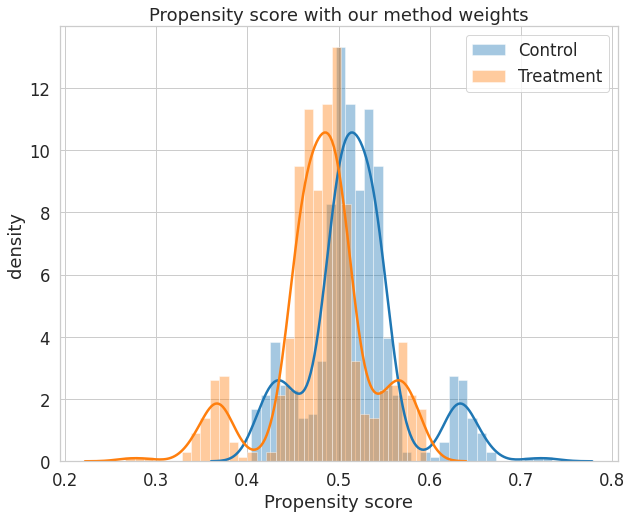

In [ ]:
ax1 = sns.distplot(data_probs5["P0"], label="Control")
ax1=sns.distplot(data_probs5["P1"], label="Treatment")
ax1.set_xlabel('Propensity score')
plt.legend()
plt.title("Propensity score with our method weights")
plt.legend()
ax1.set_ylabel('density')


Text(0, 0.5, 'density')

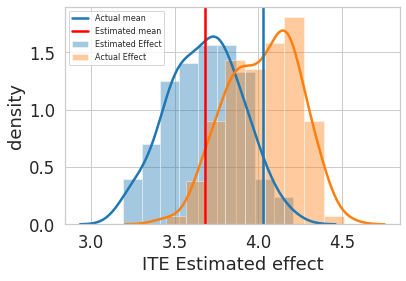

In [ ]:
ITE_arr=np.array(ITE_data.mean(axis=0))
ITE_arr_act=np.array(ITE_act_data.mean(axis=0))
ax = sns.distplot(ITE_arr, label="Estimated Effect")
ax = sns.distplot(ITE_arr_act, label="Actual Effect")
ax.set_xlabel('ITE Estimated effect')
plt.axvline(np.mean(ITE_arr_act),  label='Actual mean')
plt.axvline(np.mean(ITE_arr), color='r', label='Estimated mean')
plt.legend(prop={'size': 8})
ax.set_ylabel('density')

In [ ]:
def cal_SMD_Unweighted(x):
  data_treat=data[data['treatment']==1]
  data_control=data[data['treatment']==0]
  data_treat[x].mean()
  data_control[x].mean()
  A=(data_treat[x].mean()-data_control[x].mean())
  B=math.sqrt((np.var(data_treat[x])+np.var(data_control[x]))/2)
  d=100*(A/B)
  return d
  
def cal_SMD_weighted(x):
  X_train_d=data.iloc[:, 5:30]
  Y_train_d=data.iloc[:, 0]
  modeld = LogisticRegression()   
  #cls = CalibratedClassifierCV(model)
  modeld.fit( X_train_d, Y_train_d )
  #arr1=model.predict_proba(X_train)
  probsd=modeld.predict_proba(X_train_d)
  p=30
  data_probsd = pd.concat([X_train_d, Y_train_d], axis = 1)
  data_probsd.loc[:,['P0','P1']] = probsd
  data_probsd['ipw']= 1/data_probsd['P1']
  data_probsd.loc[:, 'e'] = np.abs(data_probsd['treatment'] - data_probsd['P1'])
  data_probsd.loc[:, 'ep'] =(data_probsd.loc[:, 'e']*p)
  data_treat=data_probsd[data_probsd['treatment']==1]
  data_control=data_probsd[data_probsd['treatment']==0]
  treat_mean=sum(data_treat[x]*data_treat['ep'])/sum(data_treat['ep'])
  control_mean=sum(data_control[x]*data_control['ep'])/sum(data_control['ep'])
  A=(treat_mean-control_mean)
  var_treat=(sum(data_treat['ep'])/((sum(data_treat['ep'])**2)-(sum(data_treat['ep']**2))))*sum((data_treat[x]-treat_mean)**2 *data_treat['ep'])
  var_control=(sum(data_control['ep'])/((sum(data_control['ep'])**2)-(sum(data_control['ep']**2))))*sum((data_control[x]-control_mean)**2 *data_control['ep'])
  B=math.sqrt((var_treat+var_control)/2)
  d=100*(A/B)
  return d

def cal_SMD_weightedinv(x):
  X_train_d=data.iloc[:, 5:30]
  Y_train_d=data.iloc[:, 0]
  modeld = LogisticRegression()   
  #cls = CalibratedClassifierCV(model)
  modeld.fit( X_train_d, Y_train_d )
  #arr1=model.predict_proba(X_train)
  probsd=modeld.predict_proba(X_train_d)
  p=30
  data_probsd = pd.concat([X_train_d, Y_train_d], axis = 1)
  data_probsd.loc[:,['P0','P1']] = probsd
  data_probsd['ipw']= 1/data_probsd['P1']
  data_probsd.loc[:, 'e'] = np.abs(data_probsd['treatment'] - data_probsd['P1'])
  data_probsd.loc[:, 'ep'] =(data_probsd.loc[:, 'e']*p)
  data_treat=data_probsd[data_probsd['treatment']==1]
  data_control=data_probsd[data_probsd['treatment']==0]
  treat_mean=sum(data_treat[x]*data_treat['ipw'])/sum(data_treat['ipw'])
  control_mean=sum(data_control[x]*data_control['ipw'])/sum(data_control['ipw'])
  A=(treat_mean-control_mean)
  var_treat=(sum(data_treat['ipw'])/((sum(data_treat['ipw'])**2)-(sum(data_treat['ipw']**2))))*sum((data_treat[x]-treat_mean)**2 *data_treat['ipw'])
  var_control=(sum(data_control['ipw'])/((sum(data_control['ipw'])**2)-(sum(data_control['ipw']**2))))*sum((data_control[x]-control_mean)**2 *data_control['ipw'])
  B=math.sqrt((var_treat+var_control)/2)
  d=100*(A/B)
  return d


In [ ]:
SMD_weighted=[]
SMD_unweighted=[]
SMD_weightedinv=[]

for i in range(3,9):
    #col.append("x"+str(i))
    x='x'+str(i)
    #print (i)
    SMD_weighted.append(np.abs(cal_SMD_weighted(x)))
    SMD_unweighted.append(np.abs(cal_SMD_Unweighted(x)))
    SMD_weightedinv.append(np.abs(cal_SMD_weightedinv(x)))



Text(0.5, 1.0, 'Absolute standardized difference')

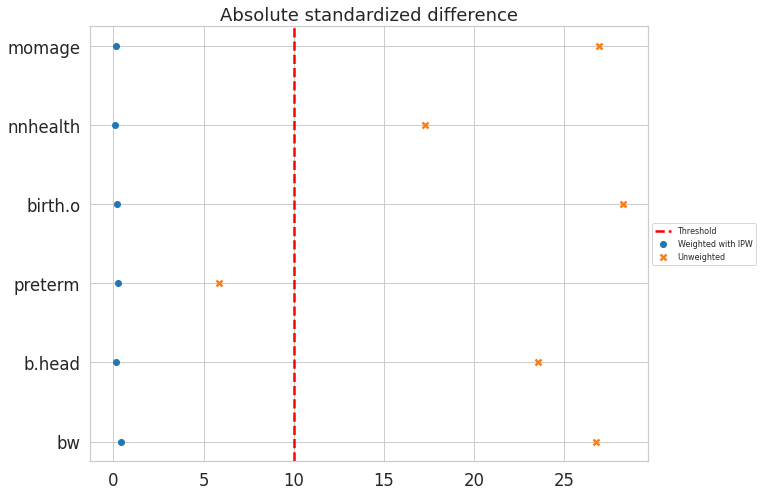

In [ ]:
variables = ["bw", "b.head", "preterm", "birth.o", "nnhealth", "momage"]
plt.scatter(SMD_weighted,variables, label='Weighted with IPW', marker='o')
plt.scatter(SMD_unweighted,variables, label='Unweighted', marker='x')
plt.axvline(10, linestyle='dashed',color='r', label='Threshold')
plt.legend(prop={'size': 8},loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Absolute standardized difference")

Text(0.5, 1.0, 'Standardized difference with our scheme')

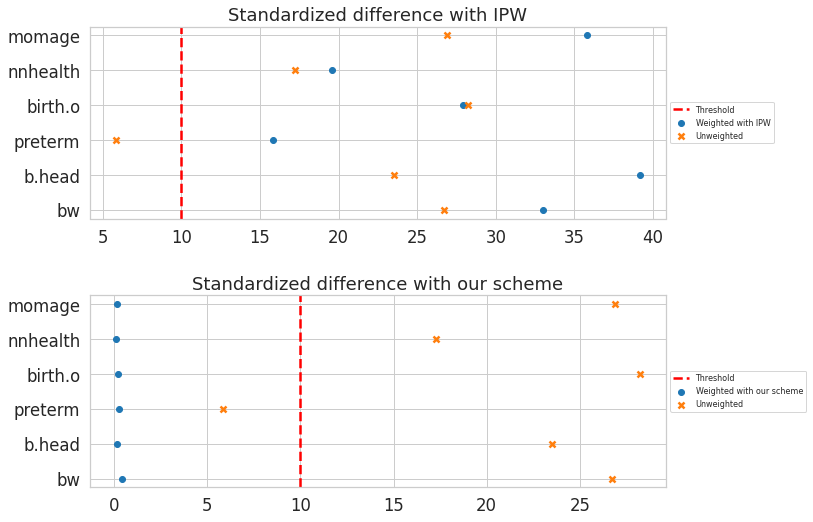

In [ ]:
fig, axs = plt.subplots(2)
#fig.suptitle('Absolute Standardized Difference on IHDP')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)



axs[0].scatter(SMD_weightedinv,variables, label='Weighted with IPW', marker='o')
axs[0].scatter(SMD_unweighted,variables, label='Unweighted', marker='x')
axs[0].axvline(10, linestyle='dashed',color='r', label='Threshold')
axs[0].legend(prop={'size': 8},loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_title('Standardized difference with IPW')

axs[1].scatter(SMD_weighted,variables, label='Weighted with our scheme', marker='o')
axs[1].scatter(SMD_unweighted,variables, label='Unweighted', marker='x')
axs[1].axvline(10, linestyle='dashed',color='r', label='Threshold')
axs[1].legend(prop={'size': 8},loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_title('Standardized difference with our scheme')

In [ ]:
from scipy.special import rel_entr
def weighted_boxplot():
  X_train_d=data.iloc[:, 5:30]
  Y_train_d=data.iloc[:, 0]
  modeld = LogisticRegression()   
  #cls = CalibratedClassifierCV(model)
  modeld.fit( X_train_d, Y_train_d )
  #arr1=model.predict_proba(X_train)
  probsd=modeld.predict_proba(X_train_d)
  p=30
  data_probsd = pd.concat([X_train_d, Y_train_d], axis = 1)
  data_probsd.loc[:,['P0','P1']] = probsd
  data_probsd['ipw']= 1/data_probsd['P1']
  data_probsd.loc[:, 'e'] = np.abs(data_probsd['treatment'] - data_probsd['P1'])
  data_probsd.loc[:, 'ep'] =(data_probsd.loc[:, 'e']*p)
  data_treat=data_probsd[data_probsd['treatment']==1]
  data_control=data_probsd[data_probsd['treatment']==0]
  weighted_treat = []
  weighted_control = []
  #weighted_rowt = data_treat['x5']*data_treat['ep']
  #weighted_rowc = data_control['x5']*data_control['ep']

  for index, row in data_treat.iterrows():
      weighted_rowt = [row.x8]*(row.ep.astype(int))
      weighted_treat += weighted_rowt
      #print('dsds')
  for index1, row1 in data_control.iterrows():
      #print('sss')
      weighted_rowc = [row1.x8]*(row1.ep.astype(int))
      weighted_control += weighted_rowc

  cate=['treated','control']
  sns.boxplot(data=[weighted_treat, weighted_control]).set(title='Weigthed (our method) plot on mom age')
  plt.xticks(plt.xticks()[0], cate)
  tcuts=[]
  ccuts=[]
  #print(weighted_rowt)
  tcuts= pd.qcut(weighted_treat, q=5)
  ccuts= pd.qcut(weighted_control, q=5)
  p=tcuts.value_counts()/len(weighted_treat)
  q=ccuts.value_counts()/len(weighted_control)
  kl_pq = rel_entr(p.values, q.values)
  print("{0:.8f}".format(sum(kl_pq)))
  #print("%.8f" %sum(kl_pq))

def weighted_boxplotins():
  X_train_d=data.iloc[:, 5:30]
  Y_train_d=data.iloc[:, 0]
  modeld = LogisticRegression()   
  #cls = CalibratedClassifierCV(model)
  modeld.fit( X_train_d, Y_train_d )
  #arr1=model.predict_proba(X_train)
  probsd=modeld.predict_proba(X_train_d)
  p=30
  data_probsd = pd.concat([X_train_d, Y_train_d], axis = 1)
  data_probsd.loc[:,['P0','P1']] = probsd
  data_probsd['ipw']= 1/data_probsd['P1']
  data_probsd.loc[:, 'e'] = np.abs(data_probsd['treatment'] - data_probsd['P1'])
  data_probsd.loc[:, 'ep'] =(data_probsd.loc[:, 'e']*p)
  data_treat=data_probsd[data_probsd['treatment']==1]
  data_control=data_probsd[data_probsd['treatment']==0]
  weighted_treat = []
  weighted_control = []
  #weighted_rowt = data_treat['x5']*data_treat['ep']
  #weighted_rowc = data_control['x5']*data_control['ep']

  for index, row in data_treat.iterrows():
      weighted_rowt = [row.x8]*(row.ipw.astype(int))
      weighted_treat += weighted_rowt
      #print('dsds')
  for index1, row1 in data_control.iterrows():
      #print('sss')
      weighted_rowc = [row1.x8]*(row1.ipw.astype(int))
      weighted_control += weighted_rowc

  cate=['treated','control']
  sns.boxplot(data=[weighted_treat, weighted_control]).set(title='Weigthed (IPW) plot on mom age')
  plt.xticks(plt.xticks()[0], cate)
  tcuts=[]
  ccuts=[]
  #print(weighted_rowt)
  tcuts= pd.qcut(weighted_treat, q=5)
  ccuts= pd.qcut(weighted_control, q=5)
  p=tcuts.value_counts()/len(weighted_treat)
  q=ccuts.value_counts()/len(weighted_control)
  kl_pq = rel_entr(p.values, q.values)
  print("{0:.8f}".format(sum(kl_pq)))
  #print("%.8f" %sum(kl_pq))

def unweighted_boxplot(att):
  cate=['treated','control']
  data_treat=data[data['treatment']==1]
  data_control=data[data['treatment']==0]
  sns.boxplot(data=[data_treat[att], data_control[att]]).set(title='Unweigthed plot on mom age')
  plt.xticks(plt.xticks()[0], cate)
  tcuts=[]
  ccuts=[]
  tcuts= pd.qcut(data_treat[att], q=5)
  ccuts= pd.qcut(data_control[att], q=5)
  p=tcuts.value_counts()/len(data_treat[att])
  q=ccuts.value_counts()/len(data_control[att])
  kl_pq = rel_entr(p.values, q.values)
  print("%.8f" %sum(kl_pq))
  #A=np.abs(np.array(data_treat[att]))
  #B=np.abs(np.array(data_control[att]))
  #res_A = np.linalg.norm(A)
  #res_B = np.linalg.norm(B)
  #AA=A/res_A
  #BB=B/res_B
  #kl_pq = rel_entr(A, B)
  #print(sum(kl_pq))
  #print (uneven_kl_divergence(AA,BB))

In [ ]:
def uneven_kl_divergence(pk,qk):
    if len(pk)>len(qk):
        pk = np.random.choice(pk,len(qk))
    elif len(qk)>len(pk):
        qk = np.random.choice(qk,len(pk))
    return np.sum(pk * np.log(pk/qk))

In [ ]:
p = [0.10, 0.40, 0.50,0.60]
q = [0.80, 0.15, 0.05]
print (uneven_kl_divergence(p,q))

1.4556090791758851


0.00283912


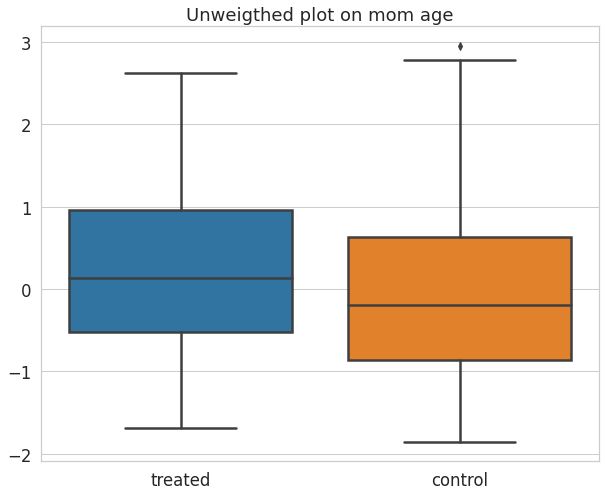

In [ ]:
x='x8'
unweighted_boxplot(x)

0.01746362


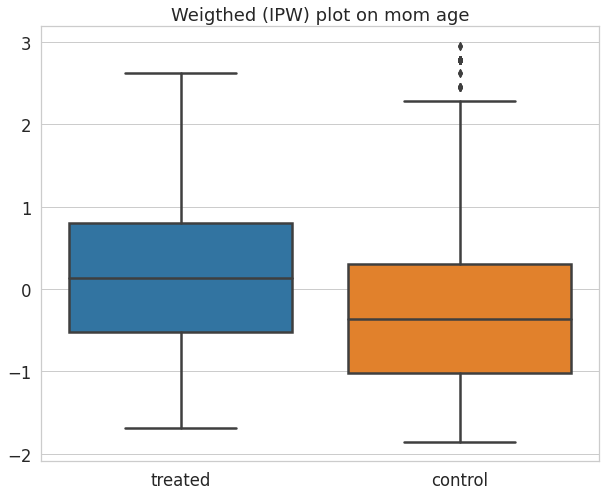

In [ ]:
weighted_boxplotins()

Contribution:
1. It can works for non-binary and continuous treatment while overlapping weight works for binary only.
2. It gives good performance even if there exist no overlap between treatment comparison group.
-------------------------------------------------------
1. check with weak and strong classifier/regressor
2. check with big and small threshold (talk about window of error space and check predictive power loss and gain)
3. check results with different * (power values)

Propensity score based weighting using error window method.....
Abbreviation (error window): A novel weighting scheme for balancing covariates in observational studies. 